<a href="https://colab.research.google.com/github/Sneazeanise/Data_Analytics_micro_cred_winter_2022/blob/main/Python/Unit3_Python_Advanced_Pandas_DataWrangling_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1 : Python Data Analysis using salaries dataset

# Data Exploration:  This should include summary statistics, means, medians, quartiles, or any other relevant information about the data set. 

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

MAKE SURE TO INPUT THE LINE DIRECTLY BELOW BEFORE ANY OF THE FOLLOWING OR IT WILL RESULT IN ERROR!!!

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/Salaries.csv')

In [5]:
type(df)

pandas.core.frame.DataFrame

In [6]:
# 397 rows = 397 employees
df.shape

(397, 7)

In [7]:
df.head()

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500


In [ ]:
df.tail()

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
392,393,Prof,A,33,30,Male,103106
393,394,Prof,A,31,19,Male,150564
394,395,Prof,A,42,25,Male,101738
395,396,Prof,A,25,15,Male,95329
396,397,AsstProf,A,8,4,Male,81035


In [ ]:
df.describe()

,Unnamed: 0,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000,397.000000
mean,199.000000,22.314861,17.614610,113706.458438
std,114.748275,12.887003,13.006024,30289.038695
min,1.000000,1.000000,0.000000,57800.000000
25%,100.000000,12.000000,7.000000,91000.000000
50%,199.000000,21.000000,16.000000,107300.000000
75%,298.000000,32.000000,27.000000,134185.000000
max,397.000000,56.000000,60.000000,231545.000000


# Mean/median of all salaries

In [ ]:
# Mean of all salaries

df.mean()

Unnamed: 0          199.000000
yrs.since.phd        22.314861
yrs.service          17.614610
salary           113706.458438
dtype: float64

In [ ]:
# Median of all salaries

df.median()

Unnamed: 0          199.0
yrs.since.phd        21.0
yrs.service          16.0
salary           107300.0
dtype: float64

# Median salary between gender and/or rank(title) Etc...


Making a new Data Frame that only has the columns 'sex' and 'salary'

MAKE SURE TO INPUT THE LINE DIRECTLY BELOW BEFORE ANY OF THE FOLLOWING OR IT WILL RESULT IN ERROR!!!

In [ ]:
df2 = df[['sex', 'salary']]

In [34]:
df2 = df[['sex', 'salary']]
df2

,sex,salary
0,Male,139750
1,Male,173200
2,Male,79750
3,Male,115000
4,Male,141500
...,...,...
392,Male,103106
393,Male,150564
394,Male,101738
395,Male,95329


In [ ]:
df2.describe()

,salary
count,397.000000
mean,113706.458438
std,30289.038695
min,57800.000000
25%,91000.000000
50%,107300.000000
75%,134185.000000
max,231545.000000


In [ ]:
df2.count

<bound method DataFrame.count of       sex  salary
0    Male  139750
1    Male  173200
2    Male   79750
3    Male  115000
4    Male  141500
..    ...     ...
392  Male  103106
393  Male  150564
394  Male  101738
395  Male   95329
396  Male   81035

[397 rows x 2 columns]>

Finding the Median salary for all males

In [35]:
df2['sex'].median
print(df2[df2['sex'] == 'Male'])

      sex  salary
0    Male  139750
1    Male  173200
2    Male   79750
3    Male  115000
4    Male  141500
..    ...     ...
392  Male  103106
393  Male  150564
394  Male  101738
395  Male   95329
396  Male   81035

[358 rows x 2 columns]


Finding the Median salary for all females

In [ ]:
df2['sex'].median
print(df2[df2['sex'] == 'Female'])

        sex  salary
9    Female  129000
19   Female  137000
24   Female   74830
34   Female   80225
35   Female   77000
47   Female  151768
48   Female  140096
52   Female   74692
63   Female  103613
68   Female  111512
84   Female  122960
90   Female   97032
103  Female  127512
114  Female  105000
119  Female   73500
123  Female   62884
127  Female   72500
132  Female   77500
133  Female   72500
148  Female  144651
153  Female  103994
179  Female   92000
186  Female  103750
218  Female  109650
230  Female   91000
231  Female   73300
233  Female  117555
237  Female   63100
245  Female   90450
253  Female   77500
254  Female  116450
274  Female   78500
316  Female   71065
323  Female  161101
332  Female  105450
334  Female  104542
341  Female  124312
358  Female  109954
361  Female  109646


Comparing the Mean salary of Males and Females

In [38]:
df2 = df.groupby(by='sex')['salary'].mean()
df2


sex
Female    101002.410256
Male      115090.418994
Name: salary, dtype: float64

In [37]:
Mean_female = df2[df2['sex'] == 'Female']['salary'].mean()
Mean_male = df2[df2['sex'] == 'Male']['salary'].mean()

Compare = Mean_male - Mean_female
print(Compare)

14088.008738003162


The difference beween the salaries of male and females is the mean values of both overall salaries. The men on average make more money than women by an average of 14088.008738.

# Data Wrangling – perform some basic transformations on the data

People who have 20 years of experience (Total: 157), (Mean Salary: 122,520.66)

In [ ]:
#more than or equal to 20 years of experience
df_experience = df[['yrs.service', 'sex']]
df_experience['yrs.service']
print(df_experience[df_experience['yrs.service']>=20])

     yrs.service   sex
3             39  Male
4             41  Male
6             23  Male
7             45  Male
8             20  Male
..           ...   ...
384           21  Male
386           27  Male
388           36  Male
392           30  Male
394           25  Male

[157 rows x 2 columns]


In [39]:
#less than 20 years of experience
df_experience = df[['yrs.service', 'sex']]
df_experience['yrs.service']
print(df_experience[df_experience['yrs.service']<20])

     yrs.service     sex
0             18    Male
1             16    Male
2              3    Male
5              6    Male
9             18  Female
..           ...     ...
390           19    Male
391           19    Male
393           19    Male
395           15    Male
396            4    Male

[240 rows x 2 columns]


Comparing the salaries of people who have 20+ years of experience vs less than 20 years of experience

In [ ]:
more_Th_20yrs = df[df['yrs.service']>=20]['salary'].mean()
less_Th_20yrs = df[df['yrs.service']<=20]['salary'].mean()
Comparison = more_Th_20yrs - less_Th_20yrs
print(Comparison)

13751.880050955413


In [ ]:
df[df['yrs.service']>=20]['salary'].mean()

122520.65605095541

In [ ]:
df[df['yrs.service']<=20]['salary'].mean()


108768.776

People who have salary of greater than or equal to 200,000

In [ ]:
df[df['salary'] >= 200000]

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
43,44,Prof,B,38,38,Male,231545
249,250,Prof,A,29,7,Male,204000
364,365,Prof,A,43,43,Male,205500


Your Findings here:
I found that the people who make 200,000 a year have 20+ years since they got a PHD., and are all male. 


# Rename values, subset columns, etc

In [40]:
df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/Salaries.csv')
df.set_index('Unnamed: 0')
newdf = df.rename(columns={'Unnamed: 0':'index of person: 0','rank':'position','yrs.since.phd':'yrs.post.phd','yrs.service':'yrs.exp'})

newdf

,index of person: 0,position,discipline,yrs.post.phd,yrs.exp,sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...,...
392,393,Prof,A,33,30,Male,103106
393,394,Prof,A,31,19,Male,150564
394,395,Prof,A,42,25,Male,101738
395,396,Prof,A,25,15,Male,95329


# Create some simple visualizations showing some simple statistics

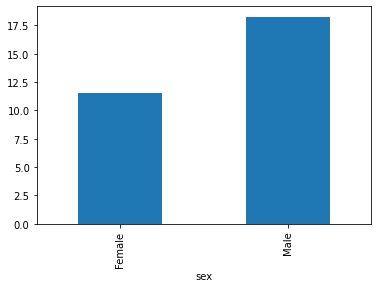

In [45]:
df.groupby('sex')['yrs.service'].mean().plot(kind = 'bar')


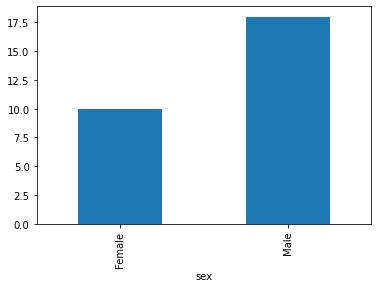

In [42]:
df.groupby('sex')['yrs.service'].median().plot(kind = 'bar')

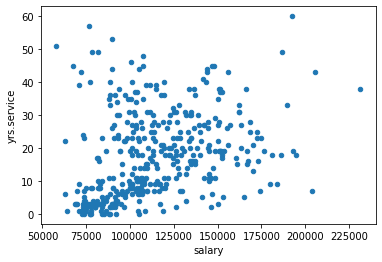

In [44]:
df.plot.scatter(x = 'salary', y = 'yrs.service')

# Draw some conclusions based on the data.  What did you discover?

Based on the analysis performed above, the conclusions are as follows:

Your Findings here:
I've noticed a few things that were consistant throughout the data. One is that males tend to stay at their respected jobs longer, which directly correlates with their greater pay when compared to females. 


I also discovered that the -

 Your Findings here:
 However, I also noticed that the assumption or higher pay tends to only be true after the years of service exceeds 40 to 50 years. This isn't true around the 20 years to 35 years range.



